## Problem 1 (LDA)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

y1 = np.array([[-0.4, 0.58, 0.089], [-0.31, 0.27, -0.04], [0.38, 0.055, -0.035], [-0.15, 0.53, 0.011], [-0.35, 0.47, 0.034], 
      [0.17, 0.69, 0.1], [-0.011, 0.55, -0.18], [-0.27, 0.61, 0.12], [-0.065, 0.49, 0.0012], [-0.12, 0.054, -0.063]])
y2 = np.array([[0.83, 1.6, -0.014], [1.1, 1.6, 0.48], [-0.44, -0.41, 0.32], [0.047, -0.45, 1.4], [0.28, 0.35, 3.1], 
      [-0.39, -0.48, 0.11], [0.34, -0.079, 0.14], [-0.3, -0.22, 2.2], [1.1, 1.2, -0.46], [0.18, -0.11, -0.49]])

### (a)(b) 

In [577]:
m1_T = np.mean(y1, axis=0).reshape(3,1)
m2_T = np.mean(y2, axis=0).reshape(3,1)

Swlda = np.zeros((3,3))
for i in range(len(y1)):
    y1_T, y2_T = y1[i,:].reshape(3,1), y2[i,:].reshape(3,1)
    Swlda += (y1_T-m1_T).dot((y1_T-m1_T).T)/len(y1)
    Swlda += (y2_T-m2_T).dot((y2_T-m2_T).T)/len(y1)
    
v = np.linalg.inv(Swlda).dot(m1_T-m2_T)
print('v =\n', v)

v =
 [[-3.83246075]
 [ 2.1374852 ]
 [-0.76736865]]


### (c) 

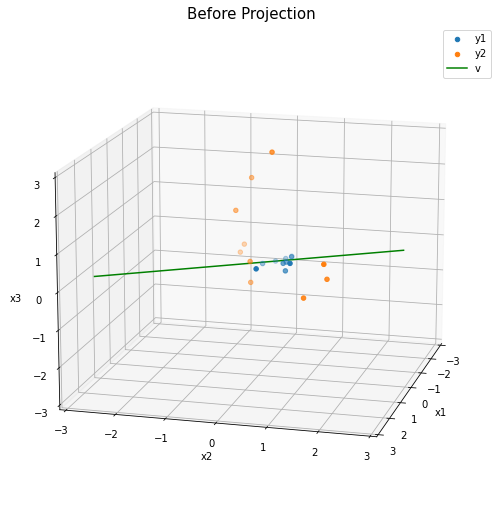

In [578]:
t = np.linspace(-1, 1)

plt.figure(figsize=(9,9))

ax = plt.axes(projection = '3d')

ax.scatter3D(y1[:,0], y1[:,1], y1[:,2], label='y1')
ax.scatter3D(y2[:,0], y2[:,1], y2[:,2], label='y2')
ax.plot3D(v[0]*t, v[1]*t, v[2]*t ,c='green', label='v')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(15, 15)
plt.title('Before Projection', fontsize = 15)
plt.legend()
plt.show()

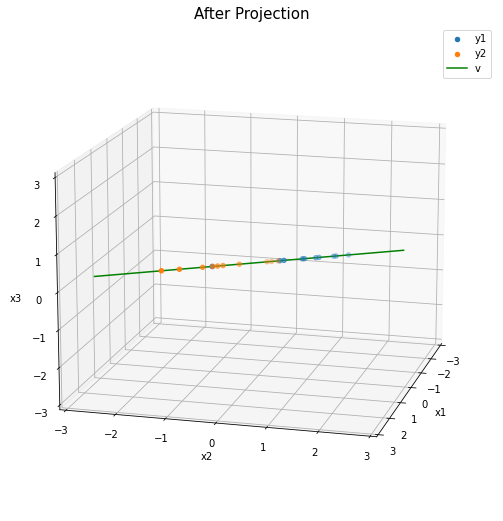

In [579]:

p_y1 = np.zeros((1,10))
pro_y1 = np.zeros((3,10))
p_y2 = np.zeros((1,10))
pro_y2 = np.zeros((3,10))

for i in range(len(y1)):
    p_y1[0,i] = y1[i,:].dot(v)/np.linalg.norm(v)
    p_y2[0,i] = y2[i,:].dot(v)/np.linalg.norm(v)
    pro_y1[:,i] = v.dot(y1[i,:].dot(v)/np.linalg.norm(v))
    pro_y2[:,i] = v.dot(y2[i,:].dot(v)/np.linalg.norm(v))
    

plt.figure(figsize=(9,9))
ax = plt.axes(projection = '3d')
ax.scatter3D(pro_y1[0,:],pro_y1[1,:],pro_y1[2,:], label='y1')
ax.scatter3D(pro_y2[0,:],pro_y2[1,:],pro_y2[2,:], label='y2')
ax.plot3D(v[0]*t, v[1]*t, v[2]*t, c='green', label='v')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(15, 15)
plt.title('After Projection', fontsize = 15)
plt.legend()
plt.show()

### (d) (e)

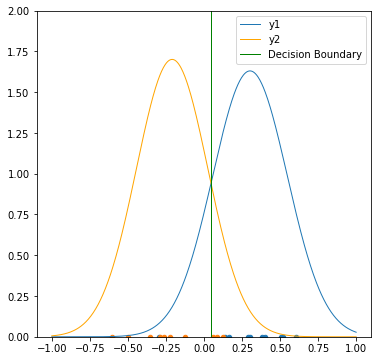

Decision boundary = 0.0461
Training error =  0.2


In [580]:
from scipy import stats as scistats
t = np.linspace(-1, 1,500)\

m1, v1 = scistats.distributions.norm.fit(p_y1)
m2, v2  = scistats.distributions.norm.fit(p_y2)
pdf_1 = scistats.distributions.norm.pdf(t, m1, v1)
pdf_2 = scistats.distributions.norm.pdf(t, m2, v2)


for i in range(500):
    if pdf_1[i]-pdf_2[i] < 0.001:
        limit = i

        
error = 0
for i in range(len(y1)):
    if p_y1[0,i] < t[limit+1]:
        error = error + 1
    if p_y2[0,i] > t[limit+1]:
        error = error + 1
        
error = error/(len(y1)+len(y2))

plt.figure(figsize=(6,6))
plt.plot(t, pdf_1, '#1f77b4', linewidth=1, label='y1')
plt.scatter(p_y1, np.zeros((1, 10)), s=20)
plt.plot(t, pdf_2, 'orange', linewidth=1, label='y2')
plt.scatter(p_y2, np.zeros((1, 10)), s=20)

plt.plot([t[limit+1], t[limit+1]], [0, 2], linewidth=1, color='g', label='Decision Boundary')


plt.ylim(0,2)
plt.legend()
plt.show()

print("Decision boundary =", round(t[limit+1],4))
print("Training error = ", error)

## Problem 2 (PCA and LDA)
 

### (a) 

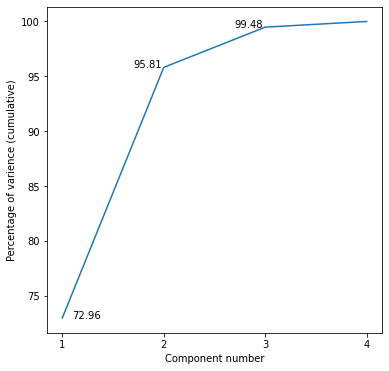

In [4]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.linalg import fractional_matrix_power

data_iris = load_iris().data
scaler = StandardScaler()
scaler.fit(data_iris)
data_norm = scaler.transform(data_iris)

pca = PCA(n_components=4)
tran_data = pca.fit_transform(data_norm)
explained = pca.explained_variance_ratio_*100
explained = np.cumsum(explained )

x = np.linspace(1, 4, 4)
plt.figure(figsize=(6,6))
plt.xlabel("Component number")
plt.ylabel("Percentage of varience (cumulative)")
plt.plot(x, explained)
plt.text(1.1, explained [0], round(explained [0], 2))
plt.text(1.7, explained [1], round(explained [1], 2))
plt.text(2.7, explained [2], round(explained [2], 2))
plt.xticks([1,2,3,4])
plt.show()

the first two components explaining 95% of the total variance in the dataset. <br>

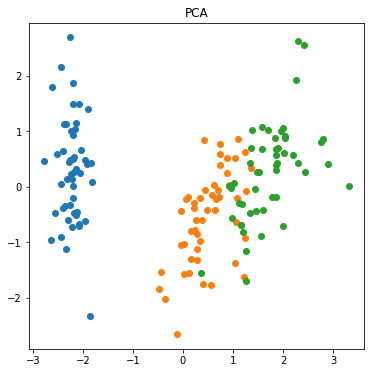

In [582]:
plt.figure(figsize=(6,6))

plt.scatter(tran_data [0:50,0],tran_data [0:50,1])
plt.scatter(tran_data [50:100,0],tran_data [50:100,1])
plt.scatter(tran_data [100:150,0],tran_data [100:150,1])
plt.title('PCA')

plt.show()

### (b) 

training error is 0.011111111111111072
test error is 0.033333333333333326


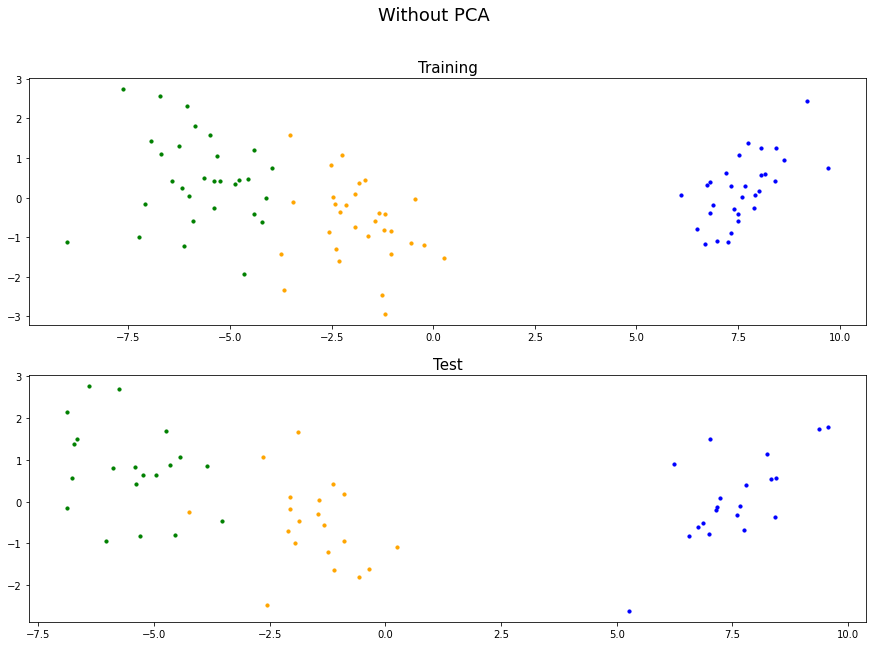

In [583]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
label_iris = load_iris().target
x1_train = data_norm[0:30,:]
x2_train = data_norm[50:80,:]
x3_train = data_norm[100:130,:]
train= np.vstack((x1_train ,x2_train ,x3_train ))
train_label = np.hstack((label_iris[0:30] ,label_iris[50:80] ,label_iris[100:130]))
x1_test = data_norm[30:50,:]
x2_test = data_norm[80:100,:]
x3_test = data_norm[130:150,:]
test= np.vstack((x1_test ,x2_test ,x3_test ))
test_label = np.hstack((label_iris[30:50] ,label_iris[80:100] ,label_iris[130:150]))

clf = LinearDiscriminantAnalysis()
clf.fit(train,train_label)
print('training error is' ,(1-clf.score(train,train_label)))
print('test error is' ,(1-clf.score(test,test_label)))
p1 = clf.transform(train)
p2 = clf.transform(test)

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
ax.scatter(p1[:30,0],p1[:30,1],s=10,c='b')
ax.scatter(p1[30:60,0],p1[30:60,1],s=10,c='orange')
ax.scatter(p1[60:90,0],p1[60:90,1],s=10,c='g')
ax.set_title("Training", fontsize = 15)
ax2 = plt.subplot(212)
ax2.scatter(p2[:20,0],p2[:20,1],s=10,c='b')
ax2.scatter(p2[20:40,0],p2[20:40,1],s=10,c='orange')
ax2.scatter(p2[40:60,0],p2[40:60,1],s=10,c='g')
ax2.set_title("Test", fontsize = 15)
plt.suptitle('Without PCA', fontsize = 18)
plt.show()

training error is 0.07777777777777772
test error is 0.06666666666666665


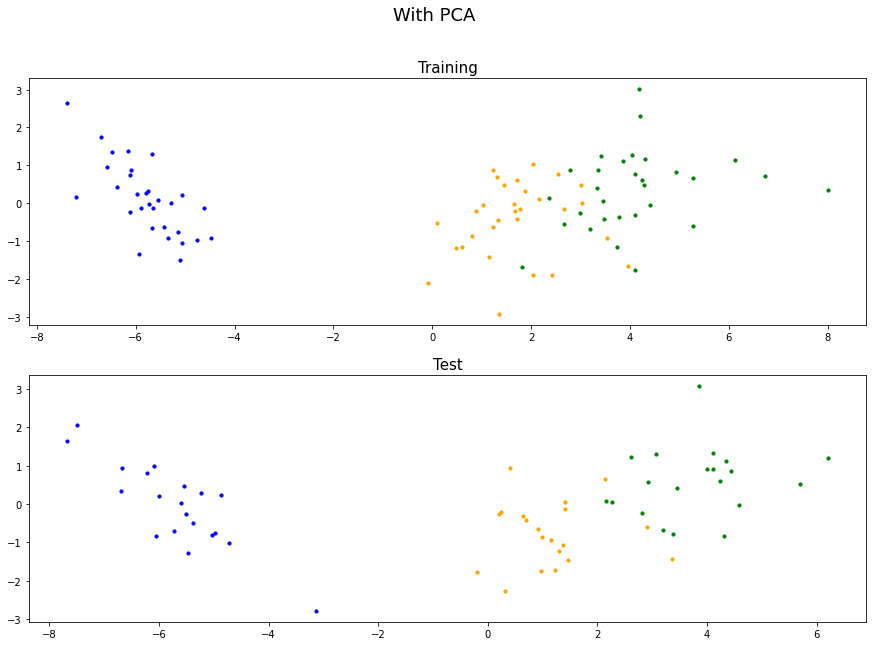

In [584]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
label_iris = load_iris().target
x1_train = tran_data[0:30,:2]
x2_train = tran_data[50:80,:2]
x3_train = tran_data[100:130,:2]
train= np.vstack((x1_train ,x2_train ,x3_train ))
train_label = np.hstack((label_iris[0:30] ,label_iris[50:80] ,label_iris[100:130]))
x1_test = tran_data[30:50,:2]
x2_test = tran_data[80:100,:2]
x3_test = tran_data[130:150,:2]
test= np.vstack((x1_test ,x2_test ,x3_test ))
test_label = np.hstack((label_iris[30:50] ,label_iris[80:100] ,label_iris[130:150]))

clf = LinearDiscriminantAnalysis()
clf.fit(train,train_label)
print('training error is' ,(1-clf.score(train,train_label)))
print('test error is' ,(1-clf.score(test,test_label)))
p1 = clf.transform(train)
p2 = clf.transform(test)


plt.figure(figsize=(15,10))
ax = plt.subplot(211)
ax.scatter(p1[:30,0],p1[:30,1],s=10,c='b')
ax.scatter(p1[30:60,0],p1[30:60,1],s=10,c='orange')
ax.scatter(p1[60:90,0],p1[60:90,1],s=10,c='g')
ax.set_title("Training", fontsize = 15)
ax2 = plt.subplot(212)
ax2.scatter(p2[:20,0],p2[:20,1],s=10,c='b')
ax2.scatter(p2[20:40,0],p2[20:40,1],s=10,c='orange')
ax2.scatter(p2[40:60,0],p2[40:60,1],s=10,c='g')
ax2.set_title("Test", fontsize = 15)
plt.suptitle('With PCA', fontsize = 18)
plt.show()

在沒有做PCA之前，在Training上的error很小，但在test 的error卻相對大，表示在訓練上可能有過度擬合的嫌疑。
當加入PCA後，經過降維度，能解決overfitting的問題，讓兩個的error相差相較來說比較小

# 

這是寫不出來的code，但花了很多時間，所以保留在這邊，在投影的地方，不知道為什麼投出來的位置怪怪的。

In [519]:
x1_train = data_norm[0:30,:]
x2_train = data_norm[50:80,:]
x3_train = data_norm[100:130,:]

x1_test = data_norm[30:50,:]
x2_test = data_norm[80:100,:]
x3_test = data_norm[130:150,:]

m1 = np.mean(x1_train, axis = 0)
m2 = np.mean(x2_train, axis = 0)
m3 = np.mean(x3_train, axis = 0)
m0 = (m1+m2+m3)/3

Sw = ((x1_train - m1).T.dot((x1_train - m1)) + (x2_train - m2).T.dot((x2_train - m2)) + (x3_train - m3).T.dot((x3_train - m3)))/30
Sb = (((m1-m0).reshape(m1.shape[0],1)@((m1-m0).reshape((1,4))))+
      ((m2-m0).reshape(m2.shape[0],1)@((m2-m0).reshape((1,4))))+
      ((m3-m0).reshape(m3.shape[0],1)@((m3-m0).reshape((1,4)))))/3

_,W= np.linalg.eig((np.linalg.inv(Sw))@(Sb))


v = W[:,0]
print(W)
v = v.reshape((4,1))
#projection_matrix=(v@v.T)/(v.T@v)
projection_matrix=W.T@np.linalg.inv(W@W.T)@W

pro_train_x1 = np.zeros((4,30))
pro_train_x2 = np.zeros((4,30))
pro_train_x3 = np.zeros((4,30))
pro = x1_train.reshape((4,1))@v.reshape((1,4))@v.reshape((1,4))
print(pro)
for i in range(len(x1_train)):
    print( x1_train[i].reshape((4,1))@v.reshape((1,4)))
    pro_train_x1[:,i] =  (x1_train[i].reshape((4,1))@v.reshape((1,4)))@v
    
    pro_train_x2[:,i] = (projection_matrix@ x2_train[i].reshape((4,1))).reshape(1,4)
    pro_train_x3[:,i] = (projection_matrix@ x3_train[i].reshape((4,1))).reshape(1,4)
print(projection_matrix@ x1_train[0].reshape((4,1)))
print(pro_train_x1[0,:])
print(pro_train_x1[1,:])
p_train_x1 =x1_train.dot(v)/np.linalg.norm(v)

# pro_y1[:,i] = v.dot(y1[i,:].dot(v)/np.linalg.norm(v))

# pro_train_x1 = np.zeros((4,30))
# for i in range(len(x1_train)):
#     pro_train_x1[:,i] = v.dot(x1_train[i,:].dot(v)/np.linalg.norm(v))
    
# print(pro_train_x1)
# print(pro_train_x1[:,1])
# pro_train_x1 = v.dot(p_train_x1.dot(v)/np.linalg.norm(v))
# p_train_x2 =x2_train.dot(v)/np.linalg.norm(v)
# pro_train_x2 = v.dot(p_train_x2.dot(v)/np.linalg.norm(v))
# p_train_x3 =x3_train.dot(v)/np.linalg.norm(v)
# pro_train_x3 = v.dot(p_train_x3.dot(v)/np.linalg.norm(v))
# lim_train_1 = ((m1+m2)/2).dot(v)/np.linalg.norm(v);
# lim_train_2 = ((m2+m3)/2).dot(v)/np.linalg.norm(v);

err_train = 0
for i in range(len(x1_train)):
    if p_train_x1[i] > lim_train_1:
        err_train = err_train  + 1
    if p_train_x2[i] < lim_train_1 or p_train_x2[i] > lim_train_2 :
        err_train  = err_train  + 1
    if p_train_x3[i] < lim_train_2 :
        err_train  = err_train  + 1

err_train  = err_train /(len(x1_train)+len(x2_train)+len(x3_train))

print("The train error is", err_train)
m1_test = np.mean(x1_test, axis = 0)
m2_test = np.mean(x2_test, axis = 0)
m3_test = np.mean(x3_test, axis = 0)
m0_test = (m1_test+m2_test+m3_test)/3

p_test_x1 =x1_test.dot(v)/np.linalg.norm(v)
p_test_x2 =x2_test.dot(v)/np.linalg.norm(v)
p_test_x3 =x3_test.dot(v)/np.linalg.norm(v)
lim_test_1 = ((m1_test+m2_test)/2).dot(v)/np.linalg.norm(v);
lim_test_2 = ((m2_test+m3_test)/2).dot(v)/np.linalg.norm(v);


err_test = 0
for i in range(len(x1_test)):
    if p_test_x1[i] > lim_test_1:
        err_test = err_test  + 1
    if p_test_x2[i] < lim_test_1 or p_test_x2[i] > lim_test_2 :
        err_test  = err_test  + 1
    if p_test_x3[i] < lim_test_2 :
        err_test  = err_test  + 1
        
err_test  = err_test /(len(x1_test)+len(x2_test)+len(x3_test))

print("The test error is",err_test)
plt.figure(figsize=(15,6))
plt.subplot(211)
plt.scatter(pro_train_x1[0,:],pro_train_x1[1,:],s=10,c='b')
plt.scatter(pro_train_x2[0,:],pro_train_x2[1,:],s=10,c='orange')
plt.scatter(pro_train_x3[0,:],pro_train_x3[1,:],s=10,c='g')
# plt.plot([lim_train_1,lim_train_1],[0,0.1], linewidth=1)
# plt.plot([lim_train_2,lim_train_2],[0,0.1], linewidth=1)
# plt.subplot(212)
# plt.scatter(p_test_x1,np.zeros((1,20)),s=10,c='b')
# plt.scatter(p_test_x2,np.zeros((1,20)),s=10,c='orange')
# plt.scatter(p_test_x3,np.zeros((1,20)),s=10,c='g')
# plt.plot([lim_test_1,lim_test_1],[0,0.1], linewidth=1)
# plt.plot([lim_test_2,lim_test_2],[0,0.1], linewidth=1)

[[-0.11380534 -0.49904145  0.87072023  0.0592535 ]
 [-0.19668696  0.64037929  0.01863892 -0.13972101]
 [ 0.73750609  0.27113886 -0.35904096 -0.75175881]
 [ 0.63596175  0.51706452 -0.33554204  0.64173652]]


ValueError: cannot reshape array of size 120 into shape (4,1)

0.022222222222222223
0.05


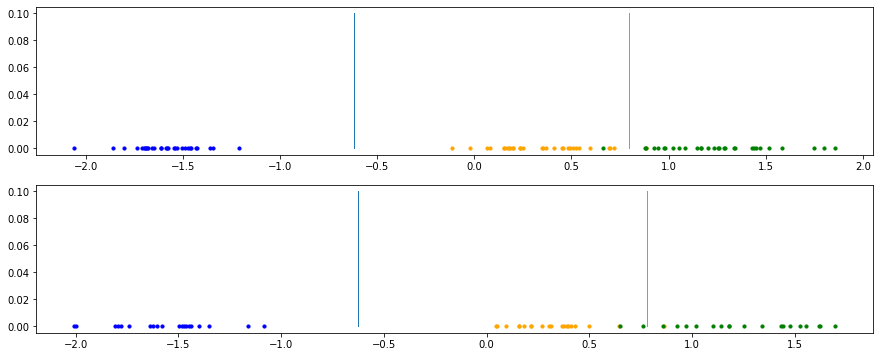

In [346]:
x1_train = tran_data[0:30,:]
x2_train = tran_data[50:80,:]
x3_train = tran_data[100:130,:]

x1_test = tran_data[30:50,:]
x2_test = tran_data[80:100,:]
x3_test = tran_data[130:150,:]

m1 = np.mean(x1_train, axis = 0)
m2 = np.mean(x2_train, axis = 0)
m3 = np.mean(x3_train, axis = 0)
m0 = (m1+m2+m3)/3

Sw = ((x1_train - m1).T.dot((x1_train - m1)) + (x2_train - m2).T.dot((x2_train - m2)) + (x3_train - m3).T.dot((x3_train - m3)))/30
Sb = ((m1-m0).dot((m1-m0).T)+(m2-m0).dot((m2-m0).T)+(m3-m0).dot((m3-m0).T))*30/3

_,W= np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
V = Sb**(-1/2)*(W)

v = V[:,1]


p_train_x1 =x1_train.dot(v)/np.linalg.norm(v)
p_train_x2 =x2_train.dot(v)/np.linalg.norm(v)
p_train_x3 =x3_train.dot(v)/np.linalg.norm(v)
lim_train_1 = ((m1+m2)/2).dot(v)/np.linalg.norm(v);
lim_train_2 = ((m2+m3)/2).dot(v)/np.linalg.norm(v);

err_train = 0
for i in range(len(x1_train)):
    if p_train_x1[i] > lim_train_1:
        err_train = err_train  + 1
    if p_train_x2[i] < lim_train_1 or p_train_x2[i] > lim_train_2 :
        err_train  = err_train  + 1
    if p_train_x3[i] < lim_train_2 :
        err_train  = err_train  + 1
        
err_train  = err_train /(len(x1_train)+len(x2_train)+len(x3_train))
print(err_train)
m1_test = np.mean(x1_test, axis = 0)
m2_test = np.mean(x2_test, axis = 0)
m3_test = np.mean(x3_test, axis = 0)
m0_test = (m1_test+m2_test+m3_test)/3

p_test_x1 =x1_test.dot(v)/np.linalg.norm(v)
p_test_x2 =x2_test.dot(v)/np.linalg.norm(v)
p_test_x3 =x3_test.dot(v)/np.linalg.norm(v)
lim_test_1 = ((m1_test+m2_test)/2).dot(v)/np.linalg.norm(v);
lim_test_2 = ((m2_test+m3_test)/2).dot(v)/np.linalg.norm(v);


err_test = 0
for i in range(len(x1_test)):
    if p_test_x1[i] > lim_test_1:
        err_test = err_test  + 1
    if p_test_x2[i] < lim_test_1 or p_test_x2[i] > lim_test_2 :
        err_test  = err_test  + 1
    if p_test_x3[i] < lim_test_2 :
        err_test  = err_test  + 1
        
err_test  = err_test /(len(x1_test)+len(x2_test)+len(x3_test))

print(err_test)
plt.figure(figsize=(15,6))
plt.subplot(211)
plt.scatter(p_train_x1,np.zeros((1,30)),s=10,c='b')
plt.scatter(p_train_x2,np.zeros((1,30)),s=10,c='orange')
plt.scatter(p_train_x3,np.zeros((1,30)),s=10,c='g')
plt.plot([lim_train_1,lim_train_1],[0,0.1], linewidth=1)
plt.plot([lim_train_2,lim_train_2],[0,0.1], linewidth=1)
plt.subplot(212)
plt.scatter(p_test_x1,np.zeros((1,20)),s=10,c='b')
plt.scatter(p_test_x2,np.zeros((1,20)),s=10,c='orange')
plt.scatter(p_test_x3,np.zeros((1,20)),s=10,c='g')
plt.plot([lim_test_1,lim_test_1],[0,0.1], linewidth=1)
plt.plot([lim_test_2,lim_test_2],[0,0.1], linewidth=1)